<a href="https://colab.research.google.com/github/poojabisht10/Deep-Learning/blob/main/Logistic_Regression_Soft_Decision_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pooja Bisht

In [2]:
#dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Loading the Dataset

In [3]:
df = pd.read_csv("glass.csv")

#Looking into the Dataset
1. Shape
2. Column names
3. Head rows

In [4]:
df.shape

(214, 10)

In [5]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [6]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


#Conclusions about Dataset
1. "Type" is the target column.
2. Yes all the columns are numeric.
3. Yes there is an "ID" column

#Defining the learning Tasks


In [7]:
# TODO: To create binary labels
df["y"] = (df["Type"] == 1).astype(int)
# TODO: To remove original Type column
df = df.drop(columns=["Type"])

#Separating Inputs and Outputs

In [9]:
# TODO: To separate features and labels
X = df.drop(columns=["y"]).values
y = df["y"].values

#Train and Test split

In [10]:
# TODO: split data

# Random state  gives reusability
# Test size gives the ratio for the test data: complete data
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)

#Scaling the Inputs
(Because the range of each column varies differently due to which sigmoid might saturate and hence learning becomes unstable)

In [11]:
# TODO: scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#each feature is now centred

The Model:

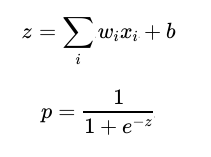

#Sigmoid Function

In [12]:
def sigmoid(z):
  # TODO return sigmoid of z
  return 1 / (1 + np.exp(-z))

#Forward Function


In [13]:
def predict_proba(X, w, b):
  # TODO: compute z using weights and bias
  z = X @ w + b
  # TODO: convert z to probability
  p = sigmoid(z)
  return p

#Loss Function : Tells us how wrong our prediction is.

In [14]:
def loss(y, p):
  # TODO: compute binary cross entropy
  return -np.mean(y*np.log(p) + (1-y)*np.log(1-p))
  #confident wrong prediction → large penalty
  #uncertain wrong prediction → smaller penalty

#Learning Step

In [15]:
def update_weights(X, y, w, b, lr):
  # TODO: compute predictions
  p = predict_proba(X, w, b)
  # TODO: compute error
  error = p - y
  # TODO: update weights and bias
  w = w - lr * (X.T @ error) /len(y)
  b = b - lr * np.mean(error)
  return w, b

  #(p - y) tells direction and strength of correction
  #learning rate controls step size

#Training Loop

In [16]:
# TODO: initialize weights and bias
w = np.zeros(X_train.shape[1])
b = 0.0
lr = 0.1
epochs = 100
for i in range(epochs):
  w, b = update_weights(X_train, y_train, w, b, lr)

# model becomes less wrong over time
# probabilities become more meaningful
# updation extent is based on lr = learning rate

#Probability to Decision conversion

In [17]:
def predict_label(p, threshold=0.5):
  return (p >= threshold).astype(int)

In [18]:
p_test = predict_proba(X_test, w, b)

y_pred_05 = predict_label(p_test, threshold=0.5)
y_pred_07 = predict_label(p_test, threshold=0.7)

In [19]:
print("0.5 as Threshold", (y_pred_05==y_test).mean())
print("0.7 as Threshold", (y_pred_07==y_test).mean())
#In glass quality control, false positives are costly

#Higher threshold = more confidence before accepting glass

0.5 as Threshold 0.8604651162790697
0.7 as Threshold 0.7209302325581395


#How Logistic Regression Differs from Perceptron

The perceptron works in a very rigid way, it makes a hard yes or no decision using a step function and doesn’t tell us how sure it is about that decision. Logistic regression is more expressive. Instead of jumping straight to 0 or 1, it uses a sigmoid function to output a probability between 0 and 1. This probability reflects the model’s confidence in its prediction. Because of this smooth behavior, logistic regression can learn gradually from its mistakes, leading to more stable and reliable training compared to the perceptron’s all or nothing updates.


#Why the Sigmoid Function Matters

The sigmoid function plays a key role because it turns the model’s raw output into a meaningful probability. This is especially important near the decision boundary, where uncertainty is high. Unlike a step function, the sigmoid curve is smooth and differentiable, which makes it possible to train the model efficiently using gradient descent. It also gives flexibility in real-world applications, since we can adjust the probability threshold depending on how cautious or aggressive we want the model’s decisions to be.


#What Problem Still Remains Unsolved

Despite its strengths, logistic regression has clear limitations. It can only learn linear decision boundaries, which means it struggles with complex, non-linear relationships in data. Its performance is also sensitive to how features are selected and scaled. When the problem involves intricate patterns or interactions between features, more powerful models such as neural networks are needed to capture that complexity.